# Importing necessary libraries

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
np.random.normal(7,0.2,5)

array([6.82924502, 7.06632751, 6.84775438, 6.52713935, 7.31754429])

# Program for sampling data from Gaussian Distribution

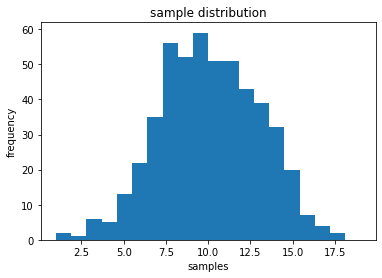

In [ ]:
# Program for sampling data from Gaussian Distribution

def pdf(x, mean, sd):
    return (1/(((2*np.pi)**0.5)*sd))*np.exp(-0.5*((x - mean)/sd)**2)

def sample_normal(mean, sd, n):
    l = []
    for j in range(n):
      # p means ___
        p = np.random.random()/2
        if p > 0.49865:
            x = round(3*sd, 3)
        else:
            x = 0
            i = 0
            step = sd/1000
            while(i<p):
                x = x + step
                i = i + pdf(x,0,sd)*step
        pn = np.random.randint(0,2)
        if pn == 0:
            l.append(round(mean - x, 3))
        else:
            l.append(round(mean + x, 3))
    return l

mean = 10
sd = 3
n = 500

l = sample_normal(mean, sd, n)                       # sampling n samples

plt.hist(l,20,(mean - 3*sd,mean + 3*sd))
plt.xlabel('samples')
plt.ylabel('frequency')
plt.title('sample distribution')
plt.show()

# Program for Gradient Descent

x = -0.9995151560994555, y = -0.9999997649263921

number of iterations = 426



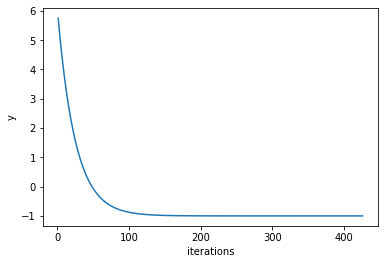


initial cost = 5.745894334788868
final cost = -0.9999997649263921


In [ ]:
# Program for Gradient Descent

def f(x):
  return x**2 + 2*x

def GDA(a):
  error = []
  n = random.random()*6 - 3
  p1 = n
  p2 = p1 - a*deriv(p1)
  e = abs(f(p1) - f(p2))
  error.append(f(p2))
  while e > 0.00000001:
    p1 = p2
    p2 = p1 - a*deriv(p1)
    e = abs(f(p1) - f(p2))
    error.append(f(p2))
  return p2, f(p2), error

def deriv(x):
  return 2*x + 2

a = 0.01
x,y,e = GDA(a)

print('x = ' + str(x) + ', y = ' + str(y))
print()
print('number of iterations = ' + str(len(e)))
print()

itr = [i+1 for i in range(len(e))]

plt.plot(itr,e)
plt.xlabel('iterations')
plt.ylabel('y')
plt.show()

print()
print('initial cost = ' + str(e[0]))
print('final cost = ' + str(e[-1]))

# Program for implementing Linear Regression using MSE

y = 2x + 5 (with noise)

y_obtained = 2.0485733463359996x + 4.864904572727607



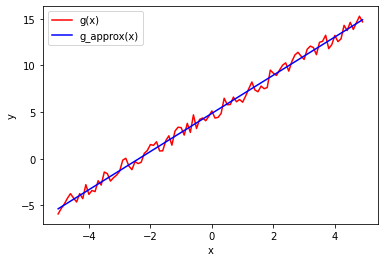

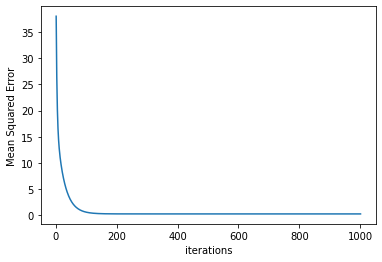


Initial MSE = 37.96215321622456
Final MSE = 0.2926826011039073


In [ ]:
# Program for implementing Linear Regression using MSE

def g(x):
  return 2*x + 5 + 2*random.random() - 1

def g_approx(x, p):
  return p[0]*x + p[1]

x = [x for x in np.arange(-5,5,0.1)]
x = np.array(x)
y = [g(x) for x in np.arange(-5,5,0.1)]
y = np.array(y)

def MSE(x,y,p):
  s = 0
  n = len(x)
  for i in range(n):
    s = s + (p[0]*x[i] + p[1] - y[i])**2
  s = s/n
  return s

def del_p0(x,y,p):
  n = len(x)
  p0 = 0
  for i in range(n):
    p0 = p0 + 2*(p[0]*x[i] + p[1] - y[i])*x[i]
  p0 = p0/n
  return p0

def del_p1(x,y,p):
  n = len(x)
  p1 = 0
  for i in range(n):
    p1 = p1 + 2*(p[0]*x[i] + p[1] - y[i])
  p1 = p1/n
  return p1

def GDA_MSE(x,y,a):
  mse = []
  p = [random.random(), random.random()]
  mse.append(MSE(x,y,p))
  p0 = p[0]
  p1 = p[1]
  p0_new = p0 - a*del_p0(x,y,p)
  p1_new = p1 - a*del_p1(x,y,p)
  for i in range(1000):
    p0 = p0_new
    p1 = p1_new
    p = [p0, p1]
    mse.append(MSE(x,y,p))
    p0_new = p0 - a*del_p0(x,y,p)
    p1_new = p1 - a*del_p1(x,y,p)
  return [p0_new, p1_new], mse

a = 0.01
p, mse = GDA_MSE(x,y,a)
z = [g_approx(i,p) for i in x]
z = np.array(z)
n = len(mse)
itr = [i+1 for i in range(n)]

print('y = 2x + 5 (with noise)')
print()
print('y_obtained = ' + str(p[0]) + 'x + ' + str(p[1]))
print()

plt.plot(x,y, color = 'r', label = 'g(x)')
plt.plot(x,z, color = 'b', label = 'g_approx(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print()

plt.plot(itr,mse)
plt.xlabel('iterations')
plt.ylabel('Mean Squared Error')
plt.show()

print()

print('Initial MSE = ' + str(mse[0]))
print('Final MSE = ' + str(mse[-1]))

# Expectaton Maximization Algorithm

The true (mean,variance) of the sets of data points are:

[[ 6  1]
 [10  1]
 [14  1]]

The (mean,variance) of the clusters are:

[[ 6.05975467  1.01506006]
 [ 9.97473906  0.97084038]
 [13.99860167  1.00268597]]


The data distribution is as follows:



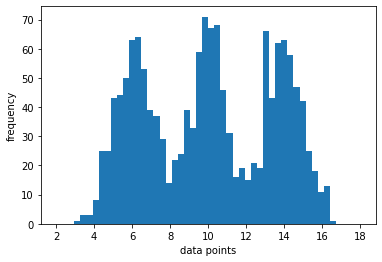

In [ ]:
def EM(l, k):
    n = len(l)
    mini = min(l)
    maxi = max(l)
    span = maxi - mini
    l[0] = l[0]/1
    l = np.array(l)
    p = []
    for i in range(1,k+1):
        p.append([mini + i*span/(k+1), span/3])
    p[0][0] = p[0][0]/1
    p = np.array(p)
    lik = []
    for j in range(k):
        lik.append([pdf(l[i],p[j][0],p[j][1]) for i in range(n)])
    lik[0][0] = lik[0][0]/1
    lik = np.array(lik)
    lik = lik/lik.sum(axis = 0)
    p = p.T
    for i in range(5000):
        for j in range(k):
            p[1][j] = ((((l - p[0][j])**2) @ lik[j]).sum()/lik[j].sum())**0.5
        p[0] = (lik @ l)/lik.sum(axis = 1)
        for i in range(k):
            lik[i] = pdf(l,p[0][i],p[1][j])
        lik = lik/lik.sum(axis = 0)
    p = p.T
    return p

gaussians = np.array([[6,1],[10,1],[14,1]])

d1 = sample_normal(6,1,500)    # mean = 6, variance = 1
d2 = sample_normal(10,1,500)   # mean = 10, variance = 1
d3 = sample_normal(14,1,500)   # mean = 14, variance = 1

l1 = []
l1 = l1 + d1 + d2 + d3

print('The true (mean,variance) of the sets of data points are:')
print()

print(gaussians)
print()

print('The (mean,variance) of the clusters are:')
print()

p1 = EM(l1, 3)                 # number of clusters = 3

print(p1)
print()

print()
print('The data distribution is as follows:')
print()

plt.hist(l1, 50, (2,18))
plt.xlabel('data points')
plt.ylabel('frequency')
plt.show()

# Logistic Regression using GDA and sigmoid function to get (a,b)

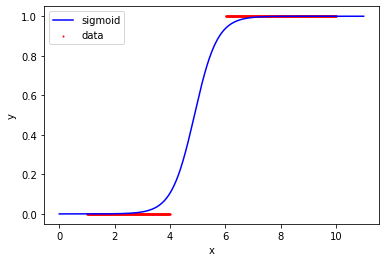

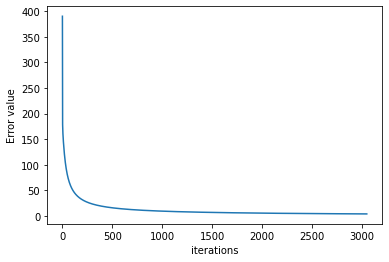


The optimal (a,b) for the sigmoid function 1/(1+exp(-(ax + b))) is:

a = 2.4279192888198393
b = -11.84585427539086

centre of the sigmoid is at x = -b/a = 4.879014854381293


In [ ]:
def MSE_log_reg(l,p,n):
    return abs((l[1]*np.log(sig(l[0],p[0],p[1])) + (1-l[1])*(np.log(1 - sig(l[0],p[0],p[1])))).sum()/n)

def del_sig_a(l, n, a, b):
    s = sig(l[0],a,b)
    return ((-l[1]*(1-s) + (1-l[1])*s)*l[0]).sum()/n

def del_sig_b(l, n, a, b):
    s = sig(l[0],a,b)
    return (-l[1]*(1-s) + (1-l[1])*s).sum()/n

def sig(x,a,b):
    return (1/(1+np.exp(-(a*x + b))))

def log_reg(l,r):
  n = len(l[0])
  l = l.T
  mse = []
  p = [1,0]
  mse.append(MSE_log_reg(l,p,n))
  p0 = p[0]
  p1 = p[1]
  p0_new = p0 - r*del_sig_a(l, n, p0, p1)
  p1_new = p1 - r*del_sig_b(l, n, p0, p1)
  p = [p0_new,p1_new]
  mse.append(MSE_log_reg(l,p,n))
  while mse[-2] - mse[-1] > 0.001:
    p0 = p0_new
    p1 = p1_new
    p0_new = p0 - r*del_sig_a(l, n, p0_new, p1_new)
    p1_new = p1 - r*del_sig_b(l, n, p0_new, p1_new)
    p = [p0_new,p1_new]
    mse.append(MSE_log_reg(l,p,n))
  return [p0_new, p1_new], mse

r = 0.001
l = []
left = [[x,0] for x in np.arange(1,4,0.01)]
right = [[x,1] for x in np.arange(6.01,10.01,0.01)]
l = left + right
l = np.array(l)
n = len(l)
p , mse = log_reg(l,r)

x = np.arange(0,11,0.01)
y = [sig(i,p[0],p[1]) for i in x]
plt.plot(x,y, label = 'sigmoid', color = 'b',)
plt.scatter(l.T[0],l.T[1], label = 'data', color = 'r', s = 1,)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print()

m = len(mse)
itr = [i for i in range(m)]
plt.plot(itr,mse)
plt.xlabel('iterations')
plt.ylabel('Error value')
plt.show()

print()
print('The optimal (a,b) for the sigmoid function 1/(1+exp(-(ax + b))) is:')
print()
print('a = ' + str(p[0]))
print('b = ' + str(p[1]))
print()
print('centre of the sigmoid is at x = -b/a = ' + str(-p[1]/p[0]))